<a href="https://colab.research.google.com/github/GuilhermeFogolin/Estudos-Dados-FECAP/blob/main/02_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("Base_De_Credito.csv",sep=";")
print(df)

     cliente  codigoconcessao situacaopagamento  tempodeatraso      situacao  \
0          1             7616            Normal              0    Adimplente   
1          2              281         Em atraso             95  Inadimplente   
2          3              282            Normal              0    Adimplente   
3          4             7889         Em atraso            106  Inadimplente   
4          5              283            Normal              0    Adimplente   
..       ...              ...               ...            ...           ...   
112      113             1967            Normal              0    Adimplente   
113      114              344            Normal              0    Adimplente   
114      115              345            Normal              0    Adimplente   
115      116              346            Normal              0    Adimplente   
116      117             1825            Normal              0    Adimplente   

    valorcredito    perda       sexo  i

In [2]:
print(df[['cliente','perda','valorcredito']])

     cliente    perda valorcredito
0          1     0,00      3520,00
1          2   866,80      1046,85
2          3     0,00      4550,00
3          4  2100,00      2625,00
4          5     0,00      1200,00
..       ...      ...          ...
112      113     0,00      3599,00
113      114     0,00      4800,00
114      115     0,00      2750,00
115      116     0,00      2105,00
116      117     0,00      3150,00

[117 rows x 3 columns]


In [4]:
print("Ordenado por perda decrescente")
print(df[['cliente','perda','valorcredito']].sort_values(by="perda", ascending=False))

Ordenado por perda decrescente
    cliente    perda valorcredito
0         1     0,00      3520,00
80       81     0,00      3599,00
79       80     0,00      2750,00
78       79     0,00      5800,00
76       77     0,00      4325,00
..      ...      ...          ...
40       41  4941,00      5490,00
29       30  5520,00      6900,00
43       44   817,80      1046,85
1         2   866,80      1046,85
31       32   892,50      1275,00

[117 rows x 3 columns]


In [5]:
print("Ordenado por perda e valor de crédito")
print(df[['cliente','perda','valorcredito']].sort_values(by=["perda","valorcredito"], ascending=[False,False]))

Ordenado por perda e valor de crédito
    cliente    perda valorcredito
31       32   892,50      1275,00
1         2   866,80      1046,85
43       44   817,80      1046,85
29       30  5520,00      6900,00
40       41  4941,00      5490,00
..      ...      ...          ...
73       74     0,00      1275,00
4         5     0,00      1200,00
46       47     0,00      1200,00
12       13     0,00      1050,00
54       55     0,00      1050,00

[117 rows x 3 columns]


In [ ]:
for i in range(len(df)):
  print("Cliente          :",df.iloc[i]['cliente'])
  print("Valor de crédito : R$",df.iloc[i]['valorcredito'])
  print("************************************")


In [9]:
print(df.count())
print(df.count()['cliente'])

cliente              117
codigoconcessao      117
situacaopagamento    117
tempodeatraso        117
situacao             117
valorcredito         117
perda                117
sexo                 117
idade                117
renda                117
numfilhos            117
estadocivil          117
regiao               117
possuiresidencia     117
gastoscartao         117
dtype: int64
117


In [18]:
df['Vendas_Decimal'] = (
    df['valorcredito']
    .str.replace('R$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

total_vendas_convertidas = df['Vendas_Decimal'].sum()
print(total_vendas_convertidas)

382797.7


In [19]:
print("TOTAL CLIENTE POR SEXO")
print(df[["sexo","cliente"]].groupby(by="sexo").count())

TOTAL CLIENTE POR SEXO
           cliente
sexo              
feminino        45
masculino       72


In [25]:
print("VALOR DE CRÉDIDO POR SEXO")
print(df[["sexo","Vendas_Decimal"]].groupby(by="sexo").sum())

VALOR DE CRÉDIDO POR SEXO
           Vendas_Decimal
sexo                     
feminino        155666.35
masculino       227131.35


In [26]:
print("VALOR DE CRÉDIDO POR SEXO")
print(df[["sexo","Vendas_Decimal"]].groupby(by="sexo").sum().reset_index())

VALOR DE CRÉDIDO POR SEXO
        sexo  Vendas_Decimal
0   feminino       155666.35
1  masculino       227131.35


In [22]:
print("QUANTIDADE DE CLIENTES POR SITUAÇÃO PAGTO.")
print(df[['situacaopagamento','cliente']].groupby('situacaopagamento').count().reset_index())

QUANTIDADE DE CLIENTES POR SITUAÇÃO PAGTO.
  situacaopagamento  cliente
0         Em atraso       34
1            Normal       83


In [27]:
print("VALOR DE CRÉDITO POR SITUAÇÃO PAGTO.")
dfAtraso=df[['situacaopagamento','Vendas_Decimal']].groupby('situacaopagamento').sum().reset_index()
print(dfAtraso)

VALOR DE CRÉDITO POR SITUAÇÃO PAGTO.
  situacaopagamento  Vendas_Decimal
0         Em atraso        116852.7
1            Normal        265945.0


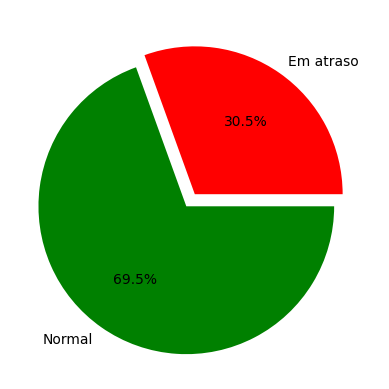

In [28]:
import matplotlib.pyplot as plt
plt.pie(dfAtraso['Vendas_Decimal'],colors=['r','g'],explode=[0,0.1],
        autopct='%1.1f%%',labels=dfAtraso['situacaopagamento'])
plt.show()

    Vendas_Decimal  tempodeatraso
0          1046.85      95.000000
1          1275.00      65.000000
2          1545.00     130.000000
3          1894.50      84.000000
4          2354.00      68.666667
5          2455.00      77.000000
6          2625.00     106.000000
7          3000.00     112.000000
8          3045.00      88.000000
9          3225.00      89.000000
10         3335.00     111.000000
11         3500.00      69.000000
12         3599.00      85.000000
13         3750.00     105.000000
14         4150.00      77.000000
15         4200.00      65.000000
16         4214.00      65.000000
17         4350.00      95.000000
18         4500.00      72.000000
19         4550.00     106.000000
20         4700.00     103.000000
21         4750.00      98.000000
22         4850.00     101.000000
23         4955.00      81.000000
24         5200.00     105.000000
25         5490.00     145.000000
26         6900.00     101.000000


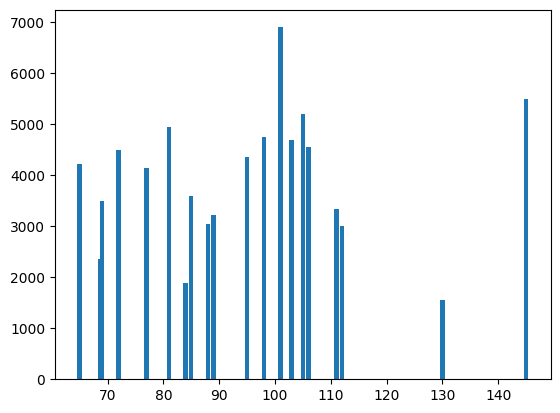

In [29]:
import matplotlib.pyplot as plt
df1=df[['Vendas_Decimal','tempodeatraso']]
df1=df1[df1["tempodeatraso"]>0]
df1=df1.sort_values(by="Vendas_Decimal")
#print(df1)
gdf=df1[['Vendas_Decimal','tempodeatraso']].groupby("Vendas_Decimal").mean().reset_index()
print(gdf)
eixoX=gdf["tempodeatraso"]
eixoY=gdf["Vendas_Decimal"]
plt.bar(eixoX,eixoY)
plt.show()

     cliente  Vendas_Decimal       FaixasCredito
0          1         3520.00     4-Acima de 3400
1          2         1046.85          1-Até 1800
2          3         4550.00     4-Acima de 3400
3          4         2625.00  2-De 1800 até 2750
4          5         1200.00          1-Até 1800
..       ...             ...                 ...
112      113         3599.00     4-Acima de 3400
113      114         4800.00     4-Acima de 3400
114      115         2750.00  2-De 1800 até 2750
115      116         2105.00  2-De 1800 até 2750
116      117         3150.00  3-De 2751 Até 3400

[117 rows x 3 columns]
        FaixasCredito  tempodeatraso
0          1-Até 1800              5
1  2-De 1800 até 2750              7
2  3-De 2751 Até 3400              4
3     4-Acima de 3400             18


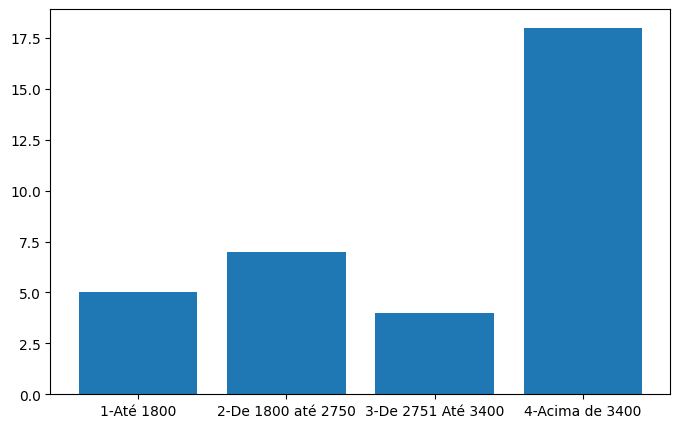

In [30]:
faixasCredito=["1-Até 1800","2-De 1800 até 2750","3-De 2751 Até 3400","4-Acima de 3400"]
faixas=[]
for i in range(len(df)):
  if (df.iloc[i]["Vendas_Decimal"]<=1800):
    faixas.append(faixasCredito[0])
  elif (df.iloc[i]["Vendas_Decimal"]<=2750):
    faixas.append(faixasCredito[1])
  elif (df.iloc[i]["Vendas_Decimal"]<=3400):
    faixas.append(faixasCredito[2])
  else:
    faixas.append(faixasCredito[3])

df["FaixasCredito"]=faixas
print(df[["cliente","Vendas_Decimal","FaixasCredito"]])
df1=df[["FaixasCredito","tempodeatraso"]]
df1=df1[df["tempodeatraso"]>0]
df1=df1.sort_values(by="FaixasCredito")
gdf=df1[["FaixasCredito","tempodeatraso"]].groupby("FaixasCredito").count().reset_index()
print(gdf)
eixoY=gdf["tempodeatraso"]
eixoX=gdf["FaixasCredito"]
plt.figure(figsize=(8,5))
plt.bar(eixoX,eixoY)
plt.show()

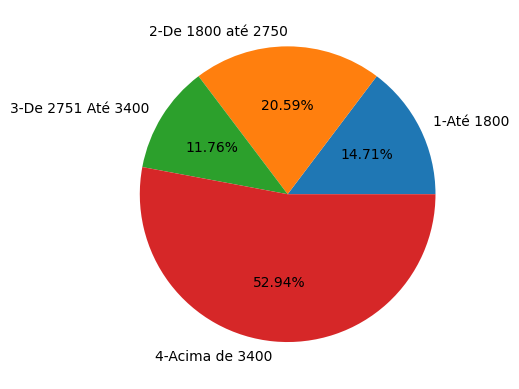

In [31]:
plt.pie(eixoY,labels=eixoX,autopct="%1.2f%%")
plt.show()

      FaixasIdade  Vendas_Decimal
0        1-Até 21     4230.166667
1  2-De 22 até 25     3095.810000
2  3-De 26 Até 30     3177.482759
3   4-Acima de 30     3208.179268


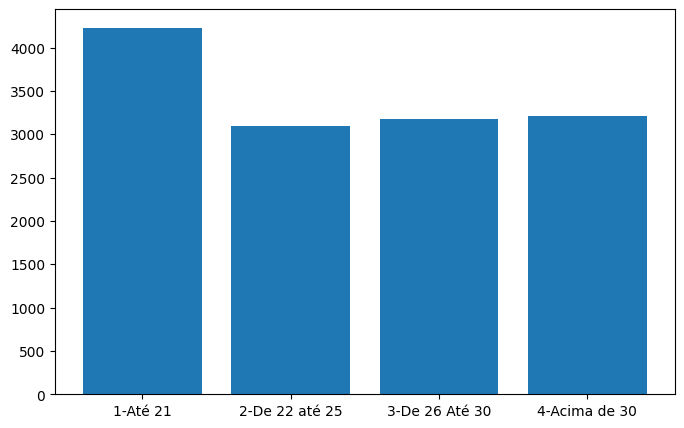

In [32]:
faixasIdade=["1-Até 21","2-De 22 até 25","3-De 26 Até 30","4-Acima de 30"]
faixas=[]
for i in range(len(df)):
  if (df.iloc[i]["idade"]<=21):
    faixas.append(faixasIdade[0])
  elif (df.iloc[i]["idade"]<=25):
    faixas.append(faixasIdade[1])
  elif (df.iloc[i]["idade"]<=30):
    faixas.append(faixasIdade[2])
  else:
    faixas.append(faixasIdade[3])

df["FaixasIdade"]=faixas
df1=df[["FaixasIdade","tempodeatraso","Vendas_Decimal"]]
df1=df1.sort_values(by="FaixasIdade")
gdf=df1[["FaixasIdade","Vendas_Decimal"]].groupby("FaixasIdade").mean().reset_index()
print(gdf)
eixoY=gdf["Vendas_Decimal"]
eixoX=gdf["FaixasIdade"]
plt.figure(figsize=(8,5))
plt.bar(eixoX,eixoY)
plt.show()